### Import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 
from sklearn.impute import SimpleImputer

from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('./EJSCREEN_2021_StatePctile_Tracts.csv')
df.head()

C:\Users\Vishnu\AppData\Local\Temp\ipykernel_2868\2867063085.py:1: DtypeWarning: Columns (128,129,130,131) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./EJSCREEN_2021_StatePctile_Tracts.csv')


,OBJECTID,ID,STATE_NAME,ST_ABBREV,REGION,ACSTOTPOP,MINORPCT,B_MINORPCT,P_MINORPCT,LOWINCPCT,...,T_PTSDF,T_PTSDF_D2,T_OZONE,T_OZONE_D2,T_PM25,T_PM25_D2,T_UST,T_UST_D2,Shape_Length,Shape_Area
0,1,1001020100,Alabama,AL,4,1993,0.167587,4,30.0,0.274962,...,0.5 facilities/km distance (54%ile),33%ile,37 ppb (24%ile),49%ile,9.15 ug/m3 (75%ile),48%ile,0.41 facilities/sq km area (35%ile),44%ile,19197.315791,1.387495e+07
1,2,1001020200,Alabama,AL,4,1959,0.617152,9,82.0,0.435927,...,0.82 facilities/km distance (65%ile),78%ile,37 ppb (25%ile),73%ile,9.18 ug/m3 (76%ile),73%ile,2.5 facilities/sq km area (77%ile),79%ile,11652.054724,4.694106e+06
2,3,1001020300,Alabama,AL,4,3507,0.348446,7,62.0,0.293128,...,1.3 facilities/km distance (77%ile),31%ile,37.1 ppb (26%ile),56%ile,9.21 ug/m3 (77%ile),55%ile,2 facilities/sq km area (71%ile),33%ile,12474.647834,7.550455e+06
3,4,1001020400,Alabama,AL,4,3878,0.103146,2,15.0,0.216864,...,2.1 facilities/km distance (89%ile),4%ile,37.1 ppb (27%ile),26%ile,9.23 ug/m3 (78%ile),23%ile,3.4 facilities/sq km area (84%ile),2%ile,14839.595823,9.007288e+06
4,5,1001020500,Alabama,AL,4,10596,0.290959,6,54.0,0.203222,...,1.1 facilities/km distance (72%ile),6%ile,37.1 ppb (28%ile),14%ile,9.24 ug/m3 (79%ile),11%ile,2.2 facilities/sq km area (74%ile),2%ile,20306.660651,1.613176e+07


In [3]:
df.shape

(74001, 136)

### Data Cleaning

In [4]:
df.isnull().sum()

OBJECTID           0
ID                 0
STATE_NAME         0
ST_ABBREV          0
REGION             0
                ... 
T_PM25_D2       1718
T_UST              0
T_UST_D2           0
Shape_Length       0
Shape_Area         0
Length: 136, dtype: int64

In [5]:
my_list = [i for i in df.columns if (i.startswith("B_") or i.startswith('P_') or i.startswith("T_") or i.startswith("D_"))]

df.drop(columns = my_list, inplace = True)

In [7]:
df.columns

Index(['OBJECTID', 'ID', 'STATE_NAME', 'ST_ABBREV', 'REGION', 'ACSTOTPOP',
       'MINORPCT', 'LOWINCPCT', 'LESSHSPCT', 'LINGISOPCT', 'UNDER5PCT',
       'OVER64PCT', 'UNEMPPCT', 'VULEOPCT', 'PRE1960PCT', 'DSLPM', 'CANCER',
       'RESP', 'PTRAF', 'PWDIS', 'PNPL', 'PRMP', 'PTSDF', 'OZONE', 'PM25',
       'UST', 'Shape_Length', 'Shape_Area'],
      dtype='object')

In [9]:
df.isnull().sum()

OBJECTID            0
ID                  0
STATE_NAME          0
ST_ABBREV           0
REGION              0
ACSTOTPOP           0
MINORPCT            0
LOWINCPCT           0
LESSHSPCT           0
LINGISOPCT          0
UNDER5PCT           0
OVER64PCT           0
UNEMPPCT            0
VULEOPCT            0
PRE1960PCT          0
DSLPM             581
CANCER            581
RESP              581
PTRAF            2678
PWDIS           19979
PNPL                0
PRMP                0
PTSDF               0
OZONE            1718
PM25             1718
UST                 0
Shape_Length        0
Shape_Area          0
dtype: int64

In [13]:
df.dropna(subset = ['CANCER','OZONE', 'PM25', 'PTRAF'], inplace = True)

In [14]:
df.isnull().sum()

OBJECTID            0
ID                  0
STATE_NAME          0
ST_ABBREV           0
REGION              0
ACSTOTPOP           0
MINORPCT            0
LOWINCPCT           0
LESSHSPCT           0
LINGISOPCT          0
UNDER5PCT           0
OVER64PCT           0
UNEMPPCT            0
VULEOPCT            0
PRE1960PCT          0
DSLPM               0
CANCER              0
RESP                0
PTRAF               0
PWDIS           18447
PNPL                0
PRMP                0
PTSDF               0
OZONE               0
PM25                0
UST                 0
Shape_Length        0
Shape_Area          0
dtype: int64

In [15]:
df.drop([29244], inplace = True)

In [16]:
df.shape
no_pop = df[df['ACSTOTPOP'] == 0]
no_pop.iloc[:,5:]

,ACSTOTPOP,MINORPCT,LOWINCPCT,LESSHSPCT,LINGISOPCT,UNDER5PCT,OVER64PCT,UNEMPPCT,VULEOPCT,PRE1960PCT,...,PTRAF,PWDIS,PNPL,PRMP,PTSDF,OZONE,PM25,UST,Shape_Length,Shape_Area
106,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,273.356438,NaN,0.191795,0.713762,0.266671,40.234862,9.086799,0.000000,41156.771145,9.104656e+07
1063,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,104.972995,3.755846e-04,0.037987,0.158071,0.584650,41.572090,9.719191,0.000000,52092.977874,5.187702e+07
1857,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,402.454515,6.650353e-02,0.239563,3.564415,9.807980,55.347314,8.718053,2.137686,21780.509943,1.959499e+07
3357,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,605.291133,1.419884e-03,0.052764,0.780088,0.187152,41.881613,9.889648,1.692986,15275.826741,7.708539e+06
7058,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,591.649350,NaN,0.095236,3.497021,23.817809,40.848822,12.246520,4.049071,12611.742985,7.728197e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68516,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1585.301891,1.214895e-04,0.109969,1.154310,1.729746,42.125963,8.271328,1.073730,36788.657699,6.019987e+07
69050,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.550050,1.006749e-02,0.086103,1.218309,0.729035,40.657580,7.966296,0.594785,20062.117590,9.852903e+06
69279,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1644.875730,3.028407e-04,0.166771,1.302046,2.478779,39.978442,6.927951,8.504964,7743.617277,3.520204e+06
69280,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,285.992935,NaN,0.184778,0.455815,0.199947,40.333394,6.870835,1.370031,15411.869887,9.527962e+06


In [17]:
no_pop = df[df['ACSTOTPOP'] == 0]
no_pop.iloc[:,5:]

nulls_in_row = no_pop.iloc[:,5:].isnull().sum(axis = 1)
zeros_in_row = (no_pop.iloc[:,5:] == 0).sum(axis = 1)

df.drop(index = (nulls_in_row + zeros_in_row == 34).index, inplace = True)

In [18]:
df.shape

(69875, 28)

### Train/Test Split for Imputers

In [19]:
X = df.drop(columns = ['CANCER', 'STATE_NAME', 'ST_ABBREV', 'ID', 'OBJECTID'])
y = df['CANCER']

X_train, X_val, Y_train, Y_val = train_test_split(X,y, test_size = 0.2, random_state = 13)

In [20]:
it = IterativeImputer(estimator = LinearRegression())
X_train_missing = it.fit_transform(X_train)
X_val_missing = it.transform(X_val)
###it_inc_missing = pd.DataFrame(X_train, columns = ['PWDIS'])
X_train_imputed = pd.DataFrame(X_train_missing, columns = it.get_feature_names_out())
X_val_imputed = pd.DataFrame(X_val_missing, columns = it.get_feature_names_out())

In [21]:
X_train_imputed.isnull().sum()

REGION          0
ACSTOTPOP       0
MINORPCT        0
LOWINCPCT       0
LESSHSPCT       0
LINGISOPCT      0
UNDER5PCT       0
OVER64PCT       0
UNEMPPCT        0
VULEOPCT        0
PRE1960PCT      0
DSLPM           0
RESP            0
PTRAF           0
PWDIS           0
PNPL            0
PRMP            0
PTSDF           0
OZONE           0
PM25            0
UST             0
Shape_Length    0
Shape_Area      0
dtype: int64

In [22]:
X_val_imputed.isnull().sum()

REGION          0
ACSTOTPOP       0
MINORPCT        0
LOWINCPCT       0
LESSHSPCT       0
LINGISOPCT      0
UNDER5PCT       0
OVER64PCT       0
UNEMPPCT        0
VULEOPCT        0
PRE1960PCT      0
DSLPM           0
RESP            0
PTRAF           0
PWDIS           0
PNPL            0
PRMP            0
PTSDF           0
OZONE           0
PM25            0
UST             0
Shape_Length    0
Shape_Area      0
dtype: int64

In [23]:
X_imputed = pd.concat([X_train_imputed, X_val_imputed])

In [24]:
X_imputed['STATE_NAME'] = df['STATE_NAME']
X_imputed['ST_ABBREV'] = df['ST_ABBREV']

In [25]:
X_imputed.isnull().sum()

REGION             0
ACSTOTPOP          0
MINORPCT           0
LOWINCPCT          0
LESSHSPCT          0
LINGISOPCT         0
UNDER5PCT          0
OVER64PCT          0
UNEMPPCT           0
VULEOPCT           0
PRE1960PCT         0
DSLPM              0
RESP               0
PTRAF              0
PWDIS              0
PNPL               0
PRMP               0
PTSDF              0
OZONE              0
PM25               0
UST                0
Shape_Length       0
Shape_Area         0
STATE_NAME      2955
ST_ABBREV       2955
dtype: int64

### Data Visualization

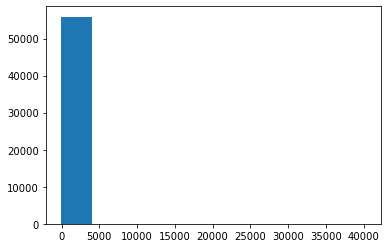

In [26]:
plt.hist(X_train_imputed['PWDIS'], bins = 10);

C:\Users\Vishnu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PWDIS'>

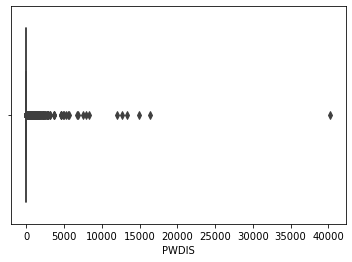

In [28]:
sns.boxplot(X_train_imputed['PWDIS'])